In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import math as m
from bisect import bisect
from scipy.interpolate import CubicSpline
from scipy.stats import betaprime 

Так как таблицу уровней значимости для критериев Фросини и Андерсона - Дарлинга удалось найти лишь для значений $\alpha=0.01,\ 0.05,\ 0.1,\ 0.15,\ 0.2$ в книге Б. Ю. Лемешко и П. Ю. Блинова "Критерии проверки отклонения распределения от равномерного закона", Новосибирск: НГТУ, 2015, то мы их нашли численным моделированием. В скобках приведены данные из книги. 

In [2]:
def fros(alpha,n,sim):
    x1=np.random.rand(sim,n)
    s1=[]
    B1=[]
    #print(x1)
    for i in range(0,sim):
        x1[i,:].sort()
        #print(x1[i])
        s1.append([])
        for k in range(0,n):
            s1[i].append(abs(x1[i,k]-(k+0.5)/n))
        #print(s1[i])
        B1.append(pow(n,-0.5)*sum(s1[i]))
    return np.percentile(B1, alpha)
def andersond(alpha,n,sim):
    x1=np.random.rand(sim,n)
    s1=[]
    B1=[]
    #print(x1)
    for i in range(0,sim):
        x1[i,:].sort()
        #print(x1[i])
        s1.append([])
        for k in range(0,n):
            s1[i].append((2*(k+1)-1)*m.log(x1[i,k],m.e)/(2*n)+(1-(2*k+1)/(2*n))*m.log(1-x1[i,k],m.e))
        #print(s1[i])
        B1.append(-n-2*sum(s1[i]))
    return np.percentile(B1, alpha)

In [3]:
N2=4000
f005=fros(99.5,20,N2)
f01=fros(99,20,N2)
f025=fros(97.5,20,N2)
f05=fros(95,20,N2)
f1=fros(90,20,N2)
f15=fros(85,20,N2)
f2=fros(80,20,N2)
f3=fros(70,20,N2)
f4=fros(60,20,N2)
a005=andersond(99.5,20,N2)
a01=andersond(99,20,N2)
a025=andersond(97.5,20,N2)
a05=andersond(95,20,N2)
a1=andersond(90,20,N2)
a15=andersond(85,20,N2)
a2=andersond(80,20,N2)
a3=andersond(70,20,N2)
a4=andersond(60,20,N2)
print('                 Table of the values of criterias ')
print('\nalpha   0.005   0.01   0.025    0.05    0.1      0.15     0.2    0.3    0.4\n')
print('Frosini %1.3f  %1.3f   %1.3f    %1.3f    %1.3f   %1.3f   %1.3f  %1.3f  %1.3f'%(f005, f01, f025, f05, f1, f15, f2, f3, f4))
print('Frosini       (0.7428)        (0.5785) (0.4966) (0.4456) (0.4083)')
print('And-Dar %1.3f  %1.3f   %1.3f    %1.3f    %1.3f   %1.3f   %1.3f  %1.3f  %1.3f'%(a005, a01, a025, a05, a1, a15, a2, a3, a4))
print('And-Dar      (3.8781) (3.0775) (2.4924) (1.9330) (1.6212)')
#ecdf = ECDF(fros(20,1000))
#plt.step(ecdf.x, ecdf.y) 

                 Table of the values of criterias 

alpha   0.005   0.01   0.025    0.05    0.1      0.15     0.2    0.3    0.4

Frosini 0.790  0.751   0.650    0.580    0.492   0.445   0.413  0.352  0.312
Frosini       (0.7428)        (0.5785) (0.4966) (0.4456) (0.4083)
And-Dar 4.221  3.593   3.154    2.492    1.882   1.629   1.413  1.110  0.901
And-Dar      (3.8781) (3.0775) (2.4924) (1.9330) (1.6212)


Напишем процедуры вычисления статистик критерия Фросини $$B=\frac{1}{\sqrt{N}}\sum_{i=1}^{N}\left| U_i-\frac{i-0.5}{N}\right|$$ и Андерсона - Дарлинга $$S=-N-2\sum_{i=1}^{N}\left( \frac{2i-1}{2N}\ln{U_i}+\left(1-\frac{2i-1}{2n}\right)\ln{(1-U_i)}\right),$$ где $U_i$ - элементы вариационного ряда, постороенного по выборке $X_1,\ldots,X_N.$

In [4]:
def frosEst(x):
   nl=len(x)
   nr=len(x[0])
   u=np.array(x)
   s=[]
   B=[]
   for i in range(0,nl):
       u[i,:].sort()
       s.append([])
       for k in range(0,nr):
           s[i].append(abs(u[i,k]-(k+0.5)/nr))
       B.append(pow(nr,-0.5)*sum(s[i]))
   return B
def andersondEst(x):
   nl=len(x)
   nr=len(x[0])
   u=np.array(x)
   s=[]
   B=[]
   for i in range(0,nl):
       u[i,:].sort()
       s.append([])
       for k in range(0,nr):
           s[i].append((2*(k+1)-1)*m.log(u[i,k],m.e)/(2*nr)+(1-(2*k+1)/(2*nr))*m.log(1-u[i,k],m.e))
       B.append(-nr-2*sum(s[i]))
   return B

Промоделируем достаточно большое число выборок из равномерного распределения и посчитаем процент, удовлетворяющих критериям $О$ и $П$ на разных уровнях значимости

In [8]:
N1=4000
x=np.random.rand(N1,20)
fx=frosEst(x)
ax=andersondEst(x)
Cr005=0
CrP005=0
Cr01=0
CrP01=0
Cr025=0
CrP025=0
Cr05=0
CrP05=0
Cr1=0
CrP1=0
Cr15=0
CrP15=0
Cr2=0
CrP2=0
Cr3=0
CrP3=0
Cr4=0
CrP4=0
for i in range(0,len(fx)):
    if (fx[i]<f005) or (ax[i]<a005):
        Cr005=Cr005+1 
    if (fx[i]<f005) and (ax[i]<a005):
        CrP005=CrP005+1
    if (fx[i]<f01) or (ax[i]<a01):
        Cr01=Cr01+1 
    if (fx[i]<f01) and (ax[i]<a01):
        CrP01=CrP01+1
    if (fx[i]<f025) or (ax[i]<a025):
        Cr025=Cr025+1 
    if (fx[i]<f025) and (ax[i]<a025):
        CrP025=CrP025+1
    if (fx[i]<f05) or (ax[i]<a05):
        Cr05=Cr05+1 
    if (fx[i]<f05) and (ax[i]<a05):
        CrP05=CrP05+1
    if (fx[i]<f1) or (ax[i]<a1):
        Cr1=Cr1+1 
    if (fx[i]<f1) and (ax[i]<a1):
        CrP1=CrP1+1
    if (fx[i]<f15) or (ax[i]<a15):
        Cr15=Cr15+1 
    if (fx[i]<f15) and (ax[i]<a15):
        CrP15=CrP15+1
    if (fx[i]<f2) or (ax[i]<a2):
        Cr2=Cr2+1 
    if (fx[i]<f2) and (ax[i]<a2):
        CrP2=CrP2+1
    if (fx[i]<f3) or (ax[i]<a3):
        Cr3=Cr3+1 
    if (fx[i]<f3) and (ax[i]<a3):
        CrP3=CrP3+1
    if (fx[i]<f4) or (ax[i]<a4):
        Cr4=Cr4+1 
    if (fx[i]<f4) and (ax[i]<a4):
        CrP4=CrP4+1
Cr005=1-Cr005/N1
Cr01=1-Cr01/N1
Cr025=1-Cr025/N1
Cr05=1-Cr05/N1
Cr1=1-Cr1/N1
Cr15=1-Cr15/N1
Cr2=1-Cr2/N1
Cr3=1-Cr3/N1
Cr4=1-Cr4/N1
CrP005=1-CrP005/N1
CrP01=1-CrP01/N1
CrP025=1-CrP025/N1
CrP05=1-CrP05/N1
CrP1=1-CrP1/N1
CrP15=1-CrP15/N1
CrP2=1-CrP2/N1
CrP3=1-CrP3/N1
CrP4=1-CrP4/N1
print('\n                   Table of significance levels')
print('\n\nalpha   0.005  0.01   0.025  0.05    0.1   0.15    0.2   0.3    0.4\n')
print('alpha O  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f'%(Cr005, Cr01, Cr025, Cr05, Cr1, Cr15, Cr2, Cr3, Cr4))
print('alpha P  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f'%(CrP005, CrP01, CrP025, CrP05, CrP1, CrP15, CrP2, CrP3, CrP4))


                   Table of significance levels


alpha   0.005  0.01   0.025  0.05    0.1   0.15    0.2   0.3    0.4

alpha O  0.004  0.010  0.018  0.040  0.091  0.132  0.177  0.275  0.363
alpha P  0.009  0.015  0.025  0.053  0.123  0.178  0.228  0.336  0.432


Интерполируем полученные значения и построим $\alpha = f(\alpha_{O})$

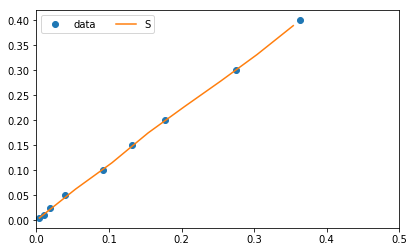

In [9]:
Alpha=[0.005,  0.01,   0.025,  0.05,    0.1,   0.15,    0.2,   0.3,   0.4]
CrArr=[Cr005, Cr01, Cr025, Cr05, Cr1, Cr15, Cr2, Cr3, Cr4]
cs = CubicSpline(CrArr, Alpha)
xs = np.arange(Cr005, Cr4, 0.05)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(CrArr, Alpha, 'o', label='data')
ax.plot(xs, cs(xs), label="S")
ax.set_xlim(0, 0.5)
ax.legend(loc='upper left', ncol=2)
plt.show()

и $\alpha=f(\alpha_{П})$

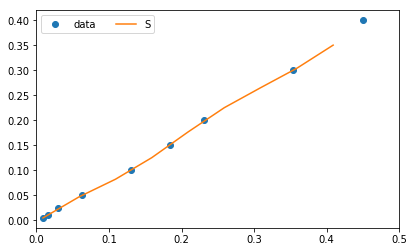

In [7]:
CrPArr=[CrP005, CrP01, CrP025, CrP05, CrP1, CrP15, CrP2, CrP3, CrP4]
csP = CubicSpline(CrPArr, Alpha)
xsP = np.arange(CrP005, CrP4, 0.05)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(CrPArr, Alpha, 'o', label='data')
ax.plot(xsP, csP(xsP), label="S")
ax.set_xlim(0, 0.5)
ax.legend(loc='upper left', ncol=2)
plt.show()

Вычислим значения критериев $О$ и $П$ в точках $\alpha = 0.01,\ 0.05,\ 0.1,\ 0.15$ по полученным функциям:

In [10]:
AlphaO=cs([0.01, 0.05, 0.1, 0.15])
AlphaP=csP([0.01, 0.05, 0.1, 0.15])
print('alpha_O/P  [0.01,      0.05,      0.1,       0.15]')
print('f(alpha_O)', AlphaO)
print('f(alpha_P)', AlphaP)

alpha_O/P  [0.01,      0.05,      0.1,       0.15]
f(alpha_O) [ 0.01036806  0.05906074  0.1102408   0.17050457]
f(alpha_P) [ 0.00562324  0.04135533  0.07550391  0.11701392]


Проверим полученные значения моделированием. Сначала найдем значения критериев Фросини и Андерсона - Дарлинга в полученных $\alpha$

In [12]:
N2=4000
fAO1=fros(100*(1-AlphaO[0]),20,N2)
fAO2=fros(100*(1-AlphaO[1]),20,N2)
fAO3=fros(100*(1-AlphaO[2]),20,N2)
fAO4=fros(100*(1-AlphaO[3]),20,N2)
fAP1=fros(100*(1-AlphaP[0]),20,N2)
fAP2=fros(100*(1-AlphaP[1]),20,N2)
fAP3=fros(100*(1-AlphaP[2]),20,N2)
fAP4=fros(100*(1-AlphaP[3]),20,N2)
aAP1=andersond(100*(1-AlphaP[0]),20,N2)
aAP2=andersond(100*(1-AlphaP[1]),20,N2)
aAP3=andersond(100*(1-AlphaP[2]),20,N2)
aAP4=andersond(100*(1-AlphaP[3]),20,N2)
aAO1=andersond(100*(1-AlphaO[0]),20,N2)
aAO2=andersond(100*(1-AlphaO[1]),20,N2)
aAO3=andersond(100*(1-AlphaO[2]),20,N2)
aAO4=andersond(100*(1-AlphaO[3]),20,N2)
print('                 Table of the values of criterias ')
print('\nalpha   %1.3f    %1.3f    %1.3f    %1.3f     %1.3f   %1.3f    %1.3f    %1.3f\n'%(AlphaO[0], AlphaO[1], AlphaO[2], AlphaO[3], AlphaP[0], AlphaP[1], AlphaP[2], AlphaP[3]))
print('Frosini   %1.3f    %1.3f    %1.3f    %1.3f     %1.3f   %1.3f    %1.3f    %1.3f'%(fAO1,fAO2,fAO3,fAO4,fAP1,fAP2,fAP3,fAP4))
print('And-Dar   %1.3f    %1.3f    %1.3f    %1.3f     %1.3f   %1.3f    %1.3f    %1.3f'%(aAO1,aAO2,aAO3,aAO4,aAP1,aAP2,aAP3,aAP4))

                 Table of the values of criterias 

alpha   0.010    0.059    0.110    0.171     0.006   0.041    0.076    0.117

Frosini   0.737    0.554    0.483    0.428     0.813   0.590    0.529    0.478
And-Dar   3.958    2.341    1.816    1.505     4.359   2.684    2.102    1.790


Теперь рассчитаем значения критериев $О$ и $П$ с этими $\alpha$

In [13]:
N1=4000
x=np.random.rand(N1,20)
fx=frosEst(x)
ax=andersondEst(x)
CrAO1=0
CrPO1=0
CrAO2=0
CrPO2=0
CrAO3=0
CrPO3=0
CrAO4=0
CrPO4=0
for i in range(0,len(fx)):
    if (fx[i]<fAO1) or (ax[i]<aAO1):
        CrAO1=CrAO1+1 
    if (fx[i]<fAP1) and (ax[i]<aAP1):
        CrPO1=CrPO1+1
    if (fx[i]<fAO2) or (ax[i]<aAO2):
        CrAO2=CrAO2+1 
    if (fx[i]<fAP2) and (ax[i]<aAP2):
        CrPO2=CrPO2+1
    if (fx[i]<fAO3) or (ax[i]<aAO3):
        CrAO3=CrAO3+1 
    if (fx[i]<fAP3) and (ax[i]<aAP3):
        CrPO3=CrPO3+1
    if (fx[i]<fAO4) or (ax[i]<aAO4):
        CrAO4=CrAO4+1 
    if (fx[i]<fAP4) and (ax[i]<aAP4):
        CrPO4=CrPO4+1
CrAO1=1-CrAO1/N1
CrAO2=1-CrAO2/N1
CrAO3=1-CrAO3/N1
CrAO4=1-CrAO4/N1
CrPO1=1-CrPO1/N1
CrPO2=1-CrPO2/N1
CrPO3=1-CrPO3/N1
CrPO4=1-CrPO4/N1
print('\n                   Table of significance levels')
#print('\n\nalpha     0.01    0.05    0.1   0.15 \n')
print('Crit O    %1.3f  %1.3f  %1.3f  %1.3f '%(CrAO1, CrAO2, CrAO3, CrAO4))
print('Crit P    %1.3f  %1.3f  %1.3f  %1.3f '%(CrPO1, CrPO2, CrPO3, CrPO4))


                   Table of significance levels
Crit O    0.010  0.056  0.105  0.159 
Crit P    0.009  0.053  0.092  0.136 


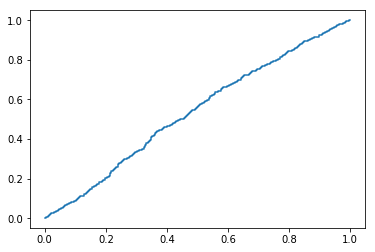

In [58]:
ah1=1.5
bh1=1.5
ch1=1.0
dh1=0.0
sample1 = betaprime.rvs(ah1, bh1, loc=dh1, scale=ch1, size=1000) 
sample2=[]
for i in range(0,len(sample1)):
    if sample1[i]<=1:
        sample2.append(sample1[i])
ecdf = ECDF(sample2)
plt.step(ecdf.x, ecdf.y)
sampleh1=[sample2[0:20],sample2[20:40],sample2[40:60],sample2[60:80]]
